# Explore here

In [2]:
!pip install keras


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd 
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

2025-03-27 14:33:28.695528: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-27 14:33:29.109595: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-27 14:33:32.781393: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-27 14:33:34.759282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743086018.380421     685 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743086019.20

In [21]:
# Obtener lista de archivos desde el directorio de entrenamiento
train_files = os.listdir("../train")

# Clasificar archivos como "perro" o "gato" basándose en el nombre del archivo
labels = ['dog' if name.startswith('dog') else 'cat' for name in train_files]

# Crear un DataFrame para organizar los datos
training_data = pd.DataFrame({'File Name': train_files, 'Label': labels})

# Mostrar las primeras filas del DataFrame para verificar la estructura
print(training_data.head())

       File Name Label
0   cat.5141.jpg   cat
1  cat.12405.jpg   cat
2   cat.4638.jpg   cat
3   cat.9024.jpg   cat
4  dog.11857.jpg   dog


In [24]:
training_data['Label'].value_counts()

Label
cat    12500
dog    12500
Name: count, dtype: int64

Hay 12500 elementos de cada tipo (gato y perro) en el Dataframe

In [25]:
# Dividimos los datos de entrenamiento en dos conjuntos: 
# Uno para entrenar el modelo (train_set) y otro para validarlo (validation_set).
# Esto nos ayuda a medir el rendimiento del modelo antes de usar el conjunto de prueba final.
train_set, validation_set = train_test_split(training_data, test_size=0.20, random_state=42)

# Restablecemos los índices de ambos conjuntos de datos para evitar inconsistencias
# con índices antiguos después de la división.
train_set = train_set.reset_index(drop=True)
validation_set = validation_set.reset_index(drop=True)

In [26]:
# Extraemos los nombres de los archivos del directorio de prueba '../test1' usando la función os.listdir().
test_filenames = os.listdir("../test1")

# Creamos un DataFrame en pandas que almacena los nombres de los archivos en la columna 'archivo'.
test_data = pd.DataFrame({'archivo': test_filenames})

# Verificamos las primeras filas del DataFrame para asegurar que los datos se hayan cargado correctamente.
print(test_data.head())

     archivo
0   7517.jpg
1  12395.jpg
2   3408.jpg
3   3572.jpg
4  11348.jpg


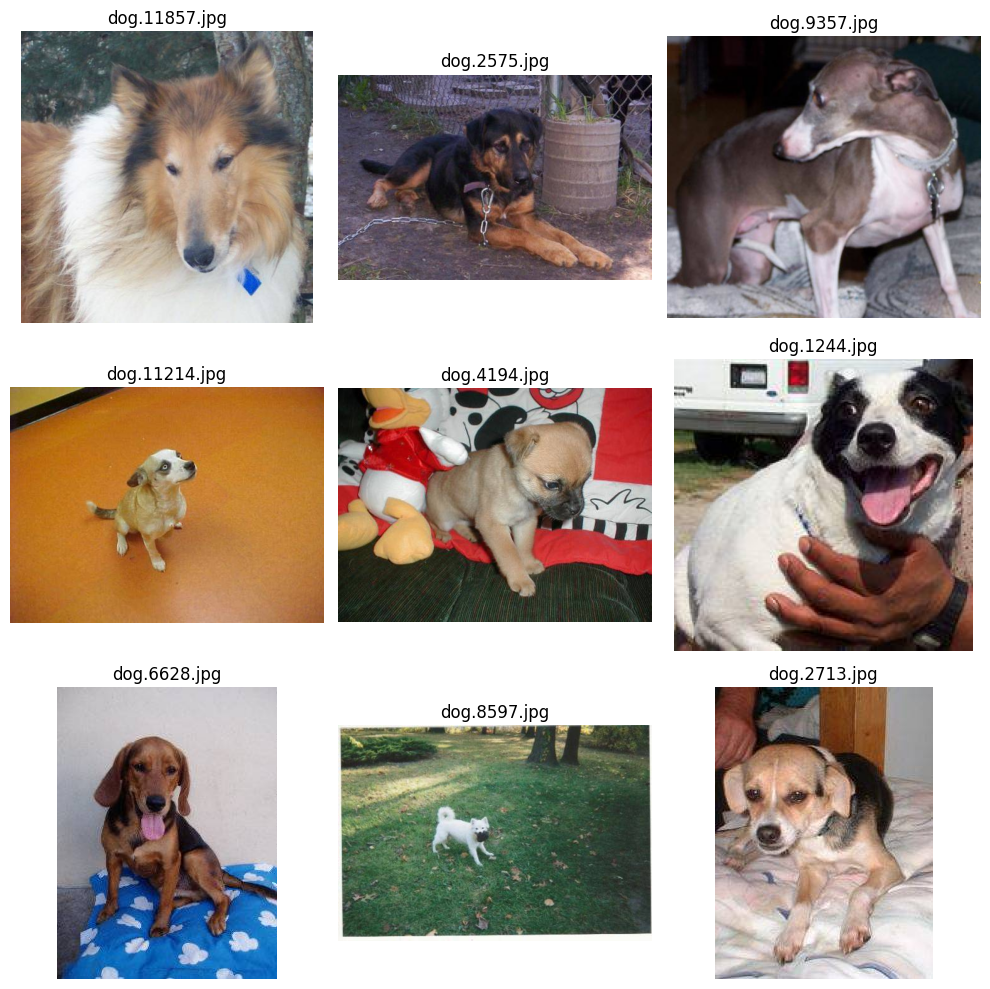

In [27]:
from PIL import Image

# Filtramos los archivos que pertenecen a la categoría 'dog' (perros) desde la lista de archivos
dog_files = [filename for filename in train_files if filename.startswith('dog')]  

# Seleccionamos solo las primeras 9 imágenes para visualización
dog_files = dog_files[:9]

# Configuramos un arreglo de subplots para mostrar las imágenes en una cuadrícula de 3x3
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for idx, ax in enumerate(axs.flat):
    # Construimos la ruta completa de cada imagen y la cargamos
    image_path = os.path.join('../train', dog_files[idx])
    image = Image.open(image_path)

    # Mostramos la imagen en la cuadrícula y ajustamos el formato
    ax.imshow(image)
    ax.axis("off")  # Eliminamos los ejes para que se vea más limpio
    ax.set_title(dog_files[idx])  # Agregamos el nombre del archivo como título en cada celda

# Ajustamos el diseño para que las imágenes se vean correctamente alineadas
plt.tight_layout()
plt.show()

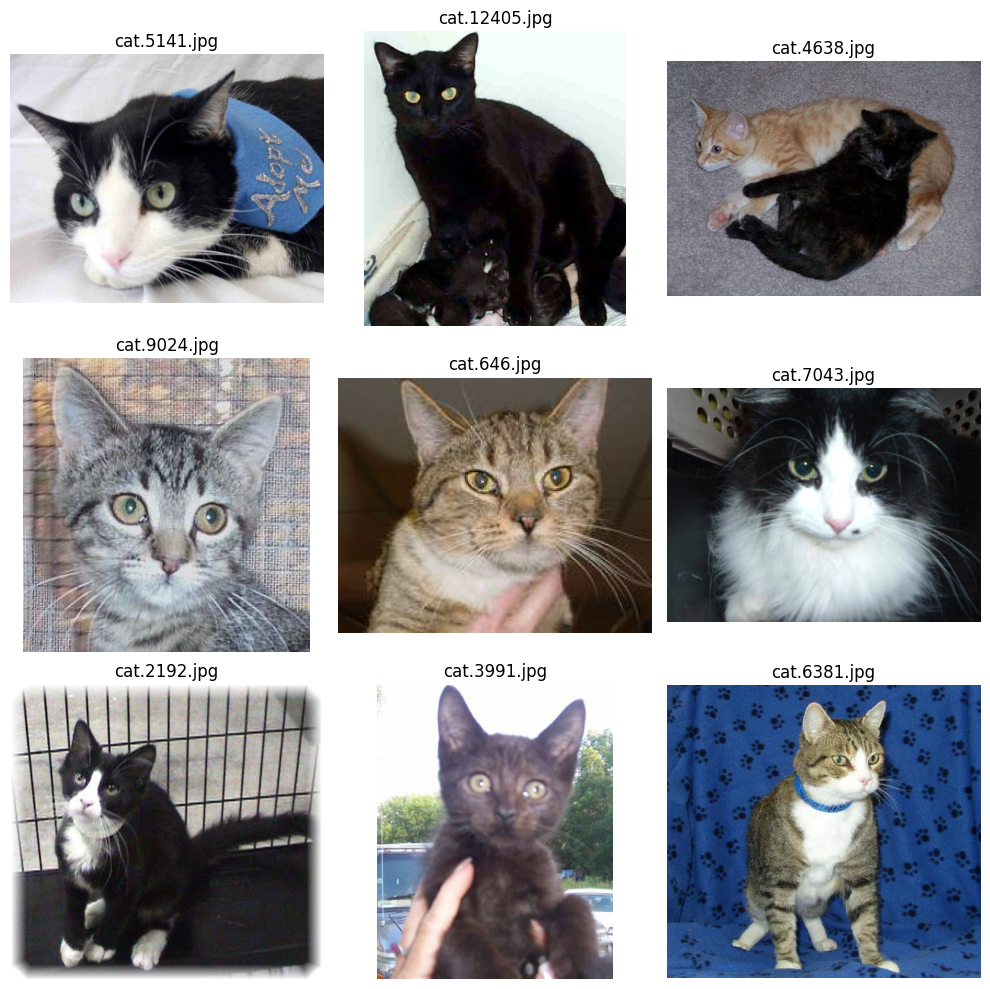

In [29]:
# Filtramos las imágenes correspondientes a la categoría 'cat' (gatos) desde la lista de archivos
cat_files = [filename for filename in train_files if filename.startswith('cat')]

# Seleccionamos las primeras 9 imágenes para construir una cuadrícula visual
cat_files = cat_files[:9]

# Configuramos un arreglo de subplots para mostrar las imágenes en un formato de 3x3
figure, axes_grid = plt.subplots(3, 3, figsize=(10, 10))

for index, axis in enumerate(axes_grid.flat):
    # Construimos la ruta completa de cada imagen y la cargamos
    image_path = os.path.join('../train', cat_files[index])
    image = Image.open(image_path)

    # Mostramos la imagen en cada subplot y personalizamos el diseño
    axis.imshow(image)
    axis.axis("off")  # Quitamos los ejes para una presentación más limpia
    axis.set_title(cat_files[index])  # Agregamos el nombre del archivo como título

# Ajustamos el diseño para que las imágenes estén correctamente alineadas
plt.tight_layout()
plt.show()

Cada imagen puede tener distintas dimensiones, resoluciones, colores (o puede ser en blanco y negro) y calidad.

Estas variaciones hacen necesario que se redimensionen todas las imágenes a un tamaño uniforme, como (200, 200) en tu caso. Esto asegura que todas las entradas al modelo tengan las mismas características, facilitando el procesamiento y la comparación.

Si no redimensionamos las imágenes, podríamos enfrentar problemas al alimentar los datos al modelo, ya que este espera un formato consistente para todas las entradas.

In [30]:
# Directorios que contienen las imágenes a procesar
image_directories = ["../train", "../test1"]

# Dimensiones deseadas para las imágenes
resize_dimensions = (200, 200)

# Procesamos cada carpeta y redimensionamos las imágenes
for directory in image_directories:
    images = os.listdir(directory)
    
    for image_name in images:
        full_path = os.path.join(directory, image_name)  # Generamos la ruta completa
        
        try:
            # Abrimos la imagen, la redimensionamos y la guardamos en la misma ubicación
            resized_image = Image.open(full_path).resize(resize_dimensions)
            resized_image.save(full_path)
        
        except Exception as error:
            print(f"Hubo un problema procesando el archivo {image_name}: {error}")

Creación del generador de imagenes

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generador para preprocesar y aumentar imágenes de entrenamiento
train_generator = ImageDataGenerator(
    rescale=1.0 / 255,   # Normalizamos los valores de píxeles (de 0-255 a 0-1)
    shear_range=0.1,     # Introducimos cizalladura para variar la perspectiva de las imágenes
    zoom_range=0.2,      # Añadimos zoom aleatorio para ampliar la variabilidad
    horizontal_flip=True # Volteamos horizontalmente algunas imágenes para enriquecer los datos
)

# Generador para la validación de datos, solo con preprocesamiento básico
validation_generator = ImageDataGenerator(
    rescale=1.0 / 255    # Solo normalizamos las imágenes
)

# Generador para pruebas, con normalización básica similar al de validación
test_generator = ImageDataGenerator(
    rescale=1.0 / 255    # Igual, normalizamos las imágenes a la escala requerida
)


In [45]:
print(test_data.columns)

Index(['archivo'], dtype='object')


In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuramos el generador de imágenes para el entrenamiento, con aumentación incluida
train_data_flow = train_generator.flow_from_dataframe(
    dataframe=train_set,
    directory="../train",      # Ruta donde se encuentran las imágenes de entrenamiento
    x_col='File Name',          # Columna que contiene los nombres de los archivos
    y_col="Label",          # Columna que indica la categoría de las imágenes
    target_size=(200, 200),    # Todas las imágenes se redimensionan a 200x200 píxeles
    batch_size=32,             # Procesamos las imágenes en lotes de 32
    class_mode="categorical"   # Las etiquetas son categóricas (perros, gatos, etc.)
)
# Generador para las imágenes de validación, sin aumentación
validation_data_flow = validation_generator.flow_from_dataframe(
    dataframe=validation_set,
    directory="../train",      # Ruta donde se encuentran las imágenes de validación
    x_col='File Name',          # Columna con los nombres de archivo
    y_col="Label",          # Etiqueta asociada
    target_size=(200, 200),    # Tamaño uniforme de las imágenes
    batch_size=32,             # Lotes de 32 imágenes
    class_mode="categorical"   # Etiquetas categóricas
)
# Renombramos la columna "archivo" a "File Name" para que coincida con el x_col del generador
test_data.rename(columns={"archivo": "File Name"}, inplace=True)
# Generador para las imágenes de prueba, solo para predecir y sin etiquetas
test_data_flow = test_generator.flow_from_dataframe(
    dataframe=test_data,
    directory="../test1",      # Carpeta que contiene las imágenes de prueba
    x_col='File Name',          # Columna con los nombres de los archivos
    y_col=None,                # Sin etiquetas en este caso
    target_size=(200, 200),    # Redimensionamos imágenes para que coincidan en tamaño
    batch_size=32,             # Procesamos en lotes de 32
    class_mode=None,           # No hay etiquetas que asociar
    shuffle=False              # Las imágenes se procesan en el orden original
)



Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 12500 validated image filenames.


In [47]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Inicializamos el modelo en forma secuencial
image_classifier = Sequential()

# Primera capa: convolución para extraer características básicas
image_classifier.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)))
image_classifier.add(MaxPooling2D(pool_size=(2, 2)))  # Reducimos el tamaño de los datos con pooling

# Segunda capa: más filtros para características avanzadas
image_classifier.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
image_classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Preparamos los datos para las capas densas
image_classifier.add(Flatten())
image_classifier.add(Dense(units=128, activation='relu'))  # Capa densa con 128 neuronas
image_classifier.add(Dropout(rate=0.5))  # Dropout para prevenir sobreajuste

# Capa de salida para clasificación en dos categorías
image_classifier.add(Dense(units=2, activation='softmax'))

# Compilamos el modelo con configuración de pérdida y optimización
image_classifier.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
